# Advanced IPR Models (Standing and Jones)

In this stage, the inflow performance (IPR) models are expanded de desempeño de afluencia (IPR) de la librería **PetroKit**, 
incorporating more realistic correlations utilizadas en la industria petrolera.

The models considered are:

- **Standing (1970)** → Representa pozos bajo empuje por gas disuelto, considering non-linear behavior entre presión y caudal.  
- **Jones (1976)** → Describes wells with damage or stimulation, introduciendo el concepto de *skin*.

These correlations allow comparing comportamientos productivos bajo distintas condiciones de formación.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from petrokit.ipr_advanced import ipr_curve, jones_ipr, plot_ipr, plot_jones_sensitivity, plot_standing_sensitivity, standing_ipr


Utilizamos **NumPy** para el manejo de arreglos y operaciones matemáticas vectorizadas,  
y **Matplotlib** para la visualización de las curvas de desempeño (IPR).

All functions are designed para ser modulares y compatibles con la futura arquitectura de `petrokit.ipr`.


El modelo de **Standing (1970)** describe el flujo bajo empuje por gas en solución:

$$
q = q_{max} \left(1 - \left(\frac{p_{wf}}{p_{res}}\right)^n\right)
    $$

donde:
- \( q_{max} \): maximum flow rate at zero flowing pressure  
- \( n \): empirical exponent (≈ 1.6 a 2.0)  
- \( p_{wf} \): flowing bottomhole pressure  
- \( p_{res} \): reservoir pressure  

El exponente \( n \) controla la **curvatura** de la relación entre presión y caudal.  
A mayor \( n \), más pronunciada es la caída del caudal con la presión.


El modelo de **Jones (1976)** incorpora el efecto de *skin*, que representa el daño o estimulación alrededor del pozo:

$$q = J_{eff} (p_{res} - p_{wf}), \quad J_{eff} = \frac{J}{1+s}
$$
donde:
- \( J \): productivity index [STB/d/psi]  
- \( s \): skin factor (*s>0*) o estimulación (*s<0*)  
- \( J_{eff} \): effective productivity  

Este modelo es **lineal**, pero adjusts the slope según el estado del pozo (dañado o estimulado).


These functions allow generating and plotting múltiples curvas IPR.

- `ipr_curve()` calculates the pairs (pwf, q) para un modelo dado.  
- `plot_ipr()` compara varios modelos en un mismo gráfico, facilitating technical visualization.

Inverting the Y axis reflects common practice en ingeniería de producción:  
**lower flowing bottomhole pressure, higher flow rate**.


Two sensitivity analysis functions are defined:

- **`plot_standing_sensitivity()`**: evalúa cómo el exponente *n* afecta la curva IPR de Standing.  
  Un mayor *n* implica mayor no linealidad y menor caudal a presiones intermedias.  

- **`plot_jones_sensitivity()`**: analiza el impacto del *skin* en la productividad.  
  Valores negativos (*estimulación*) aumentan el caudal; positivos (*daño*) lo reducen.


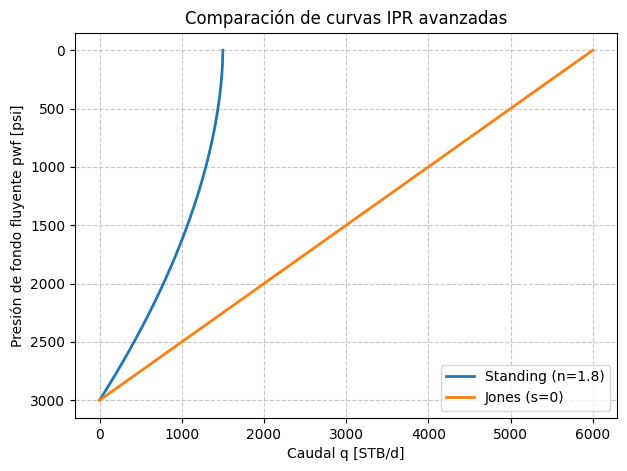

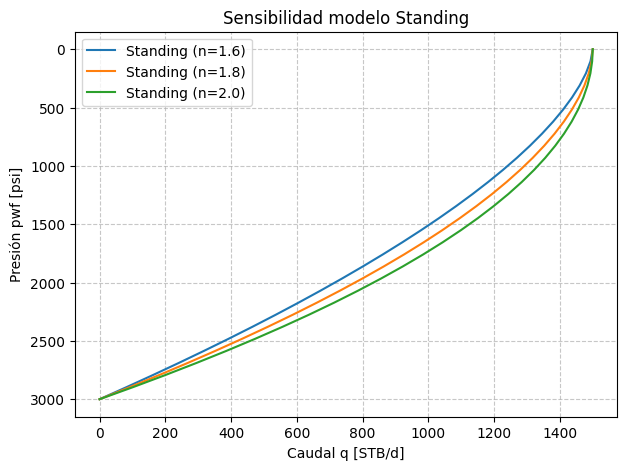

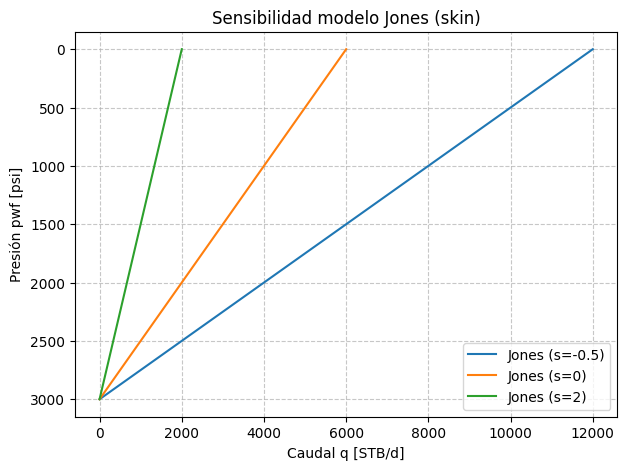

In [2]:
p_res = 3000  # psi
q_max = 1500  # STB/d
J = 2.0       # STB/d/psi

plot_ipr(
    models=[standing_ipr, jones_ipr],
    p_res=p_res,
    labels=['Standing (n=1.8)', 'Jones (s=0)'],
    kwargs_list=[{'q_max': q_max, 'n': 1.8}, {'J': J, 's': 0}]
)

plot_standing_sensitivity(p_res=p_res, q_max=q_max)
plot_jones_sensitivity(p_res=p_res, J=J)

En este ejemplo se comparan los modelos de Standing y Jones bajo condiciones iguales de presión y caudal máximo.

Posteriormente se ejecutan análisis de sensibilidad que muestran:

- Cómo varía la curva de Standing al modificar el exponente \( n \).  
- Cómo afecta el factor de *skin* en la productividad de Jones.


# Conclusiones

- El modelo de **Standing** representa el flujo bajo drive por gas disuelto, 
  y muestra un comportamiento no lineal controlado por el exponente *n*.

- El modelo de **Jones** permite representar daño o estimulación mediante el factor *skin*, 
  manteniendo una relación lineal entre presión y caudal.

- Ambas correlaciones son esenciales para análisis nodales y diagnóstico de productividad.

